<div align='center'>
    <h1>Malaria Detection from Cell Image Using Convolutional Neural Network</h1>
    <a href="https://sabbir-ahmed16.github.io/portfolio/">Portfolio</a> | <a href="https://www.linkedin.com/in/sabbir-ahmed-cuet-ete/">LinkedIn</a> | <a href="https://www.facebook.com/SabbirAhmed823">Facebook</a>
</div>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing required modules and packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
data_dir = '/content/drive/MyDrive/project/cell_images'
os.listdir(data_dir)

['test', 'train']

In [4]:
# Setting the path for training and testing directory
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [5]:
# Checking the folders in train and test directories
print('Directories inside train_dir')
os.listdir(train_dir)

Directories inside train_dir


['uninfected', 'parasitized']

In [6]:
print('Directories inside test_dir')
os.listdir(test_dir)

Directories inside test_dir


['uninfected', 'parasitized']

In [7]:
# Let's display an image from the parasitized folder
img1_path = os.path.join(train_dir, 'parasitized')

In [8]:
img1 = os.path.join(img1_path, os.listdir(img1_path)[0])

In [9]:
# Let's see the complete path of an image
img1

'/content/drive/MyDrive/project/cell_images/train/parasitized/C98P59ThinF_IMG_20150917_154452_cell_205.png'

Text(0, 0.5, 'height')

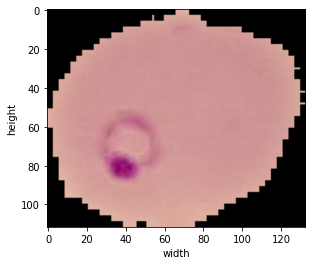

In [10]:
# Displaying the image of the above directory
plt.imshow(imread(img1))
plt.xlabel('width')
plt.ylabel('height')

In [11]:
# We can check the shape of that image
imread(img1).shape

(112, 133, 3)

In [12]:
# Now we'll display an image from the uninfected folder
img2_path = os.path.join(train_dir, 'uninfected')

In [13]:
img2 = os.path.join(img2_path, os.listdir(img2_path)[0])

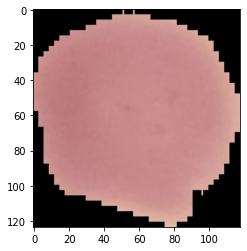

In [14]:
# Displaying the image of the above directory
plt.imshow(imread(img2))

In [15]:
# Checking how many images we have in the training and testing folder
print("Number of images in the parasitized folder of training directory")
len(os.listdir(os.path.join(train_dir, 'parasitized')))

Number of images in the parasitized folder of training directory


12479

In [16]:
print("Number of images in the uninfected folder of training directory")
len(os.listdir(os.path.join(train_dir, 'uninfected')))

Number of images in the uninfected folder of training directory


12479

In [17]:
print("Number of images in the parasitized folder of testing directory")
len(os.listdir(os.path.join(test_dir, 'parasitized')))

Number of images in the parasitized folder of testing directory


1300

In [18]:
print("Number of images in the uninfected folder of testing directory")
len(os.listdir(os.path.join(test_dir, 'uninfected')))

Number of images in the uninfected folder of testing directory


1300

#### Real world images are of various shapes. But for feeding the neural network, all the images must be of same dimension.
- Here we'll observe the shapes of the images using  plot

In [19]:
height = []
width = []

for filename in os.listdir(os.path.join(train_dir, 'parasitized')):
    
    img = imread(os.path.join(train_dir, 'parasitized', filename))
    d1,d2,colors = img.shape
    height.append(d1)
    width.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'height')

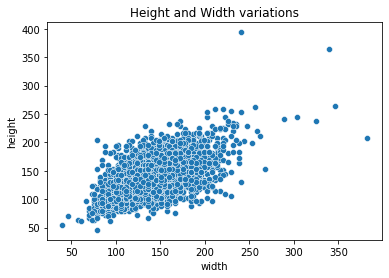

In [20]:
sns.scatterplot(height, width)
plt.title('Height and Width variations')
plt.xlabel('width')
plt.ylabel('height')

- Notice how the height and width of different images are varying. Therefore in order to pass them into neural network, we need
  to resize them obviously we'll do that writing code. Now what should be the dimensions? We can take the mean of dimensions and   use it to resize our images.

In [21]:
# Mean of heights of all images
print(np.mean(height))

134.360205144643


In [22]:
# Mean of width of all images
print(np.mean(width))

133.66447632021797


We can take the image size as 130 x 130 x 3

In [23]:
image_shape = (130, 130, 3)

### Data Augmentation
- Data augmentation means to generate more images from the available images by rotating, zooming, flipping and so on.
- It is done in case of having small number of images for training. Because neural networks require huge number of samples for     training.
- Another reason is that, suppose you want a neural network to recognize your face from selfie. Now you can take take selfie from different angles and you may sometimes zoom your camera for taking selfie. So to deal with real world data, data augmentation can help us.

In [24]:
# Importing ImageDataGenerator class from the image module of Keras API
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,  # rotation range in degree
                               width_shift_range=0.1,  # width shifting
                               height_shift_range=0.1, # height shifting
                               shear_range=0.1,  # shear intensity
                               zoom_range=0.1,  # zoom range
                               horizontal_flip=True,  # horizontal flip
                               fill_mode='nearest')

### Building the Convolutional Neural Network
- Few things to mention here are:
  - Neural networks can be built in keras in 3 ways: using - Sequential model, Functional API and Subclassing
  - For easy understanding I'll build it using Sequential model
  - Sequential model helps to build a NN using a stack of layers placing one after another easily.
  - We'll use Conv2D, MaxPool2D, Flatten, Dense and Dropout layers to build the network

In [26]:
# Importing the sequential class from model of keras API
from tensorflow.keras.models import Sequential

In [27]:
# Importing the layers we mentioned above
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [28]:
# Building the network
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

### Few parameters of compile method to know:
- <b>loss='binary_crossentropy':</b> Binary crossentropy is a loss function which calculates the error when we feed the neural network a parasitized cell but it predicts the image as uninfected cell.
- <b>optimizer='adam':</b> Adam is an algorithm for changing the weights and learning rate of NN in order to reduce losses
- <b>metrics=['accuracy']:</b> It helps to keep track of the accuracy of the model while training

In [29]:
# Compiling our model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
# Let's take a look at our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

### Preparing our training and testing dataset
- In this part, we'll make our training and testing dataset ready to feed into neural network after applying augmentation.
- A few things to notice here:
  - flow_from_directory() is method of the object image_gen.
  - parameters required to be passed to the method are: training data directory, image color mode(rgb or binary), batch size and class mode
  - image color mode: describes whether the images are color(rgb) images or black and white(binary) image
  - batch size: simply tells how many many images will be fed into the neural network at a time
  - class mode: binary meaning we have two classes - either infected(i.e. parasitizer) or uninfected
  - shuffle=True: shuffles the images each time a batch is feed into the NN(Neural Network)

In [31]:
BATCH_SIZE = 32

In [32]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=image_shape[:2], # (130, 130)
                                               color_mode='rgb',
                                               batch_size=BATCH_SIZE,
                                               class_mode='binary',
                                               shuffle=True)

Found 24958 images belonging to 2 classes.


In [33]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],  # (130, 130)
                                               color_mode='rgb',
                                               batch_size=BATCH_SIZE,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [34]:
# Let's see how our classes are defined by class mode
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

<i>Notice that our parasitized class is represented by 0 and uninfected by 1.</i>

In [35]:
history = model.fit(train_image_gen, epochs=16, validation_data=test_image_gen, verbose=2)

Epoch 1/16
780/780 - 998s - loss: 0.4229 - accuracy: 0.7958 - val_loss: 0.2216 - val_accuracy: 0.9192 - 998s/epoch - 1s/step
Epoch 2/16
780/780 - 152s - loss: 0.1985 - accuracy: 0.9349 - val_loss: 0.1860 - val_accuracy: 0.9400 - 152s/epoch - 195ms/step
Epoch 3/16
780/780 - 154s - loss: 0.1744 - accuracy: 0.9469 - val_loss: 0.1810 - val_accuracy: 0.9423 - 154s/epoch - 197ms/step
Epoch 4/16
780/780 - 152s - loss: 0.1653 - accuracy: 0.9498 - val_loss: 0.1468 - val_accuracy: 0.9519 - 152s/epoch - 195ms/step
Epoch 5/16
780/780 - 152s - loss: 0.1590 - accuracy: 0.9496 - val_loss: 0.1558 - val_accuracy: 0.9465 - 152s/epoch - 195ms/step
Epoch 6/16
780/780 - 153s - loss: 0.1537 - accuracy: 0.9504 - val_loss: 0.1638 - val_accuracy: 0.9469 - 153s/epoch - 196ms/step
Epoch 7/16
780/780 - 153s - loss: 0.1512 - accuracy: 0.9517 - val_loss: 0.1467 - val_accuracy: 0.9512 - 153s/epoch - 196ms/step
Epoch 8/16
780/780 - 153s - loss: 0.1528 - accuracy: 0.9512 - val_loss: 0.1573 - val_accuracy: 0.9477 - 153

### Evaluating the model performance
- Plot the accuracy and loss plot for training and validation data

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
# Creating a pandas dataframe of training history
history_df = pd.DataFrame(history.history)

In [38]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.422912,0.795817,0.221645,0.919231
1,0.198548,0.934931,0.186025,0.940000
2,0.174399,0.946871,0.181037,0.942308
3,0.165286,0.949836,0.146767,0.951923
4,0.159038,0.949595,0.155789,0.946538
5,0.153710,0.950397,0.163843,0.946923
6,0.151170,0.951679,0.146738,0.951154
7,0.152754,0.951198,0.157335,0.947692
8,0.147559,0.952200,0.146498,0.950769
9,0.144585,0.952640,0.165527,0.944231


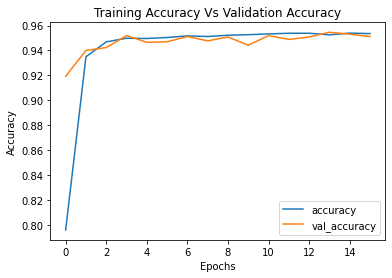

In [39]:
history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

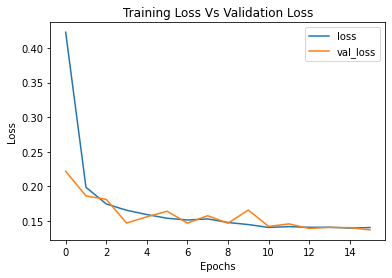

In [40]:
history_df[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [41]:
# Checking the loss and accuracy of the model on the test set
model.evaluate(test_image_gen, verbose=1)

82/82 [==============================] - 14s 175ms/step - loss: 0.1433 - accuracy: 0.9477


[0.14327038824558258, 0.947692334651947]

So, the accuracy of our model on the test set(i.e. the images which the model didn't seen during training) is 95.53%.

### Generating a Classification Report and Confusion Matrix
- Classification report shows the precision, recall and f1-score of our model
- Confusion matrix displays how many many images were falsely classified as Uninfected and Parasitized, how many images were truly classified as Uninfected and Parasitized

You can learn about precision, recall, f1-score and confusion matrix from the
<a href="https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/">link</a>

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# Making predictions on the data from test set
predictions = model.predict(test_image_gen)

In [44]:
predictions

array([[1.6954875e-03],
       [1.5966501e-03],
       [8.3926941e-05],
       ...,
       [9.7628409e-01],
       [9.7576356e-01],
       [9.3382770e-01]], dtype=float32)

Here predictions is showing the probability score for each image being a parasitized or not-parasitize

In [45]:
# We want our model to predict a cell as uninfected(label - 1) if the probability is higher than 0.8.
predictions = predictions > 0.8

In [46]:
# Checking the classes(two classes: parasitized and uninfected) of test data.
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [47]:
# Generating the classification report
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1300
           1       0.96      0.91      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [48]:
import itertools

In [49]:
cm = confusion_matrix(test_image_gen.classes, predictions)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.cividis):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")

    else:
        
        print('Confusion matrix, without normalization')
        
    print(cm)

#     thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white")  # if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1248   52]
 [ 112 1188]]


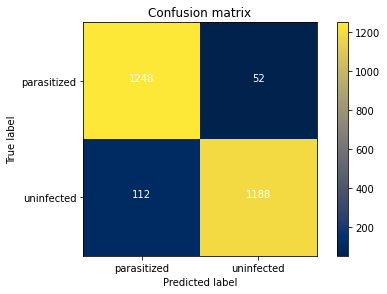

In [50]:
labels = ['parasitized', 'uninfected']
plot_confusion_matrix(cm=cm, classes=labels)